<a href="https://colab.research.google.com/github/ujjain127/Neophytenest_Mr_Pulse/blob/main/Heart_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Neophyte Nest/dataset.csv')

**Exploratory Data Analysis & Data Preprocessing**

In [ ]:
df.shape

(504, 10)

In [ ]:
df.dtypes

,0
Age,int64
Weight,int64
Height,int64
Sex,object
BMI,float64
Temperature,int64
Heart_rate,int64
SPO2,int64
Ecg,int64
Status,int64


In [ ]:
df.isnull().sum()

,0
Age,0
Weight,0
Height,0
Sex,0
BMI,0
Temperature,0
Heart_rate,0
SPO2,0
Ecg,0
Status,0


In [ ]:
df.describe()

,Age,Weight,Height,BMI,Temperature,Heart_rate,SPO2,Ecg,Status
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,59.232143,73.712302,164.712302,27.205873,27.928571,64.642857,93.214286,0.238095,0.476190
std,10.552325,12.008056,9.431060,4.087379,8.356070,12.876205,7.862240,0.426341,0.499929
min,30.000000,48.000000,140.000000,18.115413,5.000000,36.000000,71.000000,0.000000,0.000000
25%,51.000000,65.000000,158.000000,24.526673,25.750000,56.750000,91.750000,0.000000,0.000000
50%,59.000000,74.000000,165.000000,26.775510,31.000000,67.000000,96.000000,0.000000,0.000000
75%,66.000000,81.000000,171.000000,29.410992,34.000000,75.000000,98.000000,0.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,36.000000,83.000000,100.000000,1.000000,1.000000


In [ ]:
df.tail(30)

,Age,Weight,Height,Sex,BMI,Temperature,Heart_rate,SPO2,Ecg,Status
474,50,73,160,Female,28.515625,30,77,100,0,0
475,62,74,147,Female,34.244991,36,67,96,0,0
476,68,60,150,Female,26.666667,31,62,97,0,0
477,63,88,175,Male,28.734694,35,74,97,0,0
478,53,108,178,Male,34.086605,29,76,99,0,0
479,48,87,169,Male,30.461118,33,72,95,0,0
480,74,72,181,Male,21.977351,35,74,97,0,0
481,66,70,162,Male,26.672763,35,82,99,0,0
482,49,89,185,Male,26.004383,36,75,98,0,0
483,62,100,176,Male,32.283058,34,81,98,0,0


In [ ]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [ ]:
df.head(30)

,Age,Weight,Height,Sex,BMI,Temperature,Heart_rate,SPO2,Ecg,Status
0,53,90,175,1,29.387755,29,60,95,0,0
1,67,70,157,0,28.398718,30,61,96,0,0
2,54,54,164,1,20.077335,31,62,97,0,0
3,66,67,158,0,26.838648,32,63,98,0,0
4,50,87,153,0,37.165193,33,64,99,0,0
5,50,75,175,1,24.489796,34,65,100,0,0
6,55,80,165,1,29.384757,35,66,95,0,0
7,72,80,175,1,26.122449,36,67,96,0,0
8,58,84,163,0,31.615793,29,68,97,0,0
9,60,71,170,1,24.567474,30,69,98,0,0


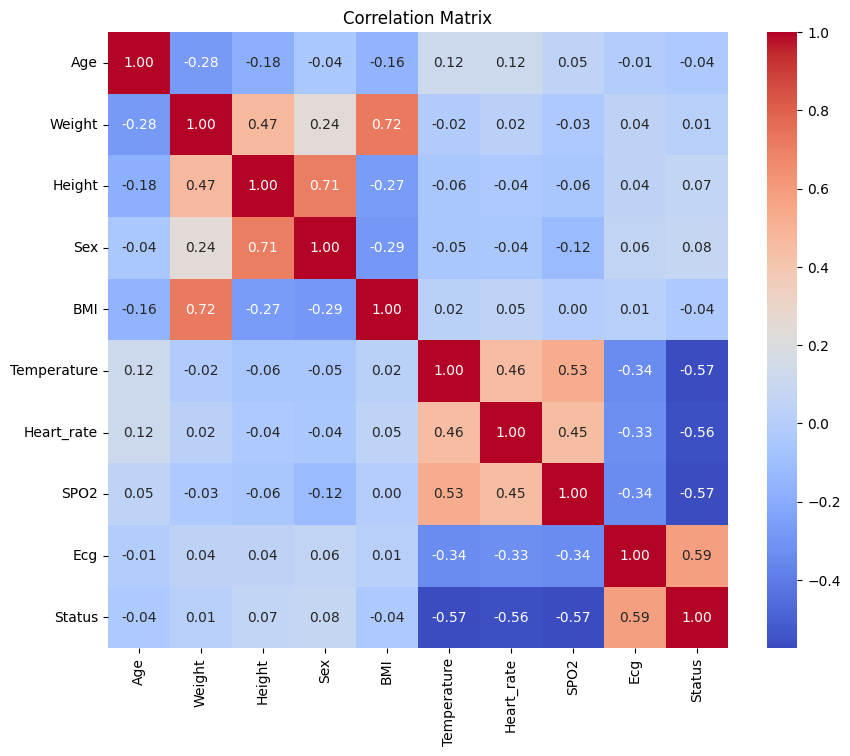

In [ ]:
#Correlation Matrix

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['Status'].value_counts()

,count
Status,
0,264
1,240


In [ ]:
# Defining features and target variable
X = df.drop('Status', axis=1)
y = df['Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Selection**

In [ ]:
log_reg = LogisticRegression()
tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(kernel='linear')
nb_clf = GaussianNB()
rf_clf = RandomForestClassifier(n_estimators=100)



Logistic Regression accuracy: 0.89
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        59
           1       0.90      0.83      0.86        42

    accuracy                           0.89       101
   macro avg       0.89      0.88      0.89       101
weighted avg       0.89      0.89      0.89       101

Logistic Regression Confusion Matrix:
[[55  4]
 [ 7 35]]


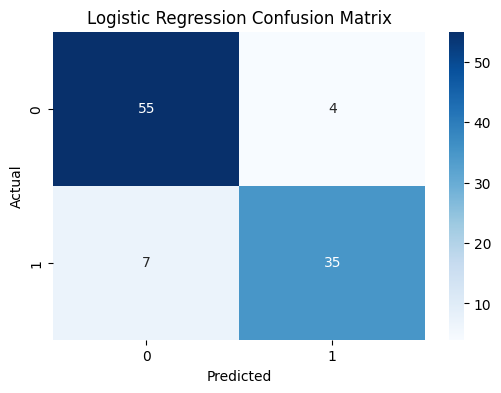

___________________________________________________________________


Decision Tree accuracy: 0.99
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.98      0.99        42

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Decision Tree Confusion Matrix:
[[59  0]
 [ 1 41]]


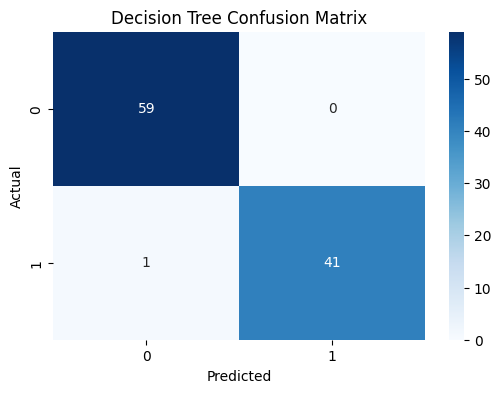

___________________________________________________________________


K-Nearest Neighbors accuracy: 0.87
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        59
           1       1.00      0.69      0.82        42

    accuracy                           0.87       101
   macro avg       0.91      0.85      0.86       101
weighted avg       0.89      0.87      0.87       101

K-Nearest Neighbors Confusion Matrix:
[[59  0]
 [13 29]]


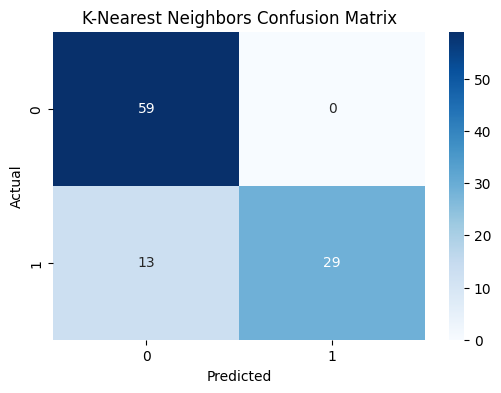

___________________________________________________________________


Support Vector Machine accuracy: 0.88
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.88      0.83      0.85        42

    accuracy                           0.88       101
   macro avg       0.88      0.87      0.88       101
weighted avg       0.88      0.88      0.88       101

Support Vector Machine Confusion Matrix:
[[54  5]
 [ 7 35]]


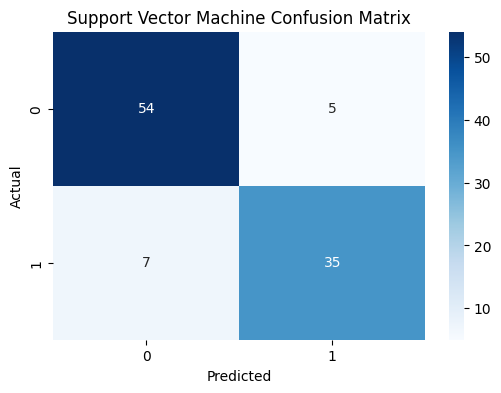

___________________________________________________________________


Naive Bayes accuracy: 0.89
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        59
           1       1.00      0.74      0.85        42

    accuracy                           0.89       101
   macro avg       0.92      0.87      0.88       101
weighted avg       0.91      0.89      0.89       101

Naive Bayes Confusion Matrix:
[[59  0]
 [11 31]]


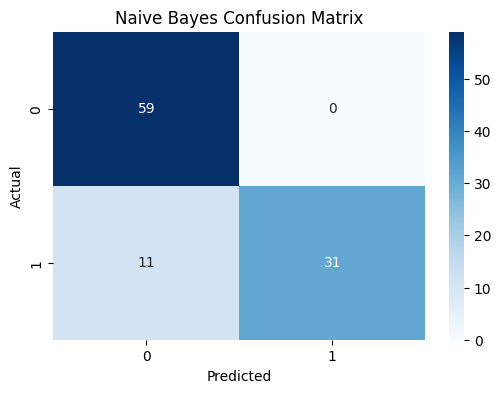

___________________________________________________________________


Random Forest accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        42

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

Random Forest Confusion Matrix:
[[59  0]
 [ 0 42]]


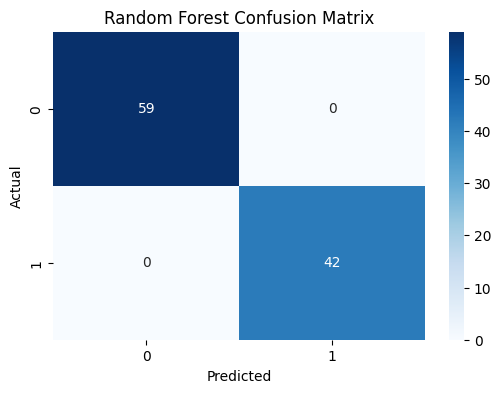

___________________________________________________________________


In [ ]:
# List of classifiers
classifiers = [
    ("Logistic Regression", log_reg),
    ("Decision Tree", tree_clf),
    ("K-Nearest Neighbors", knn_clf),
    ("Support Vector Machine", svm_clf),
    ("Naive Bayes", nb_clf),
    ("Random Forest", rf_clf)
]

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\n")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy:.2f}")

    # Classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('___________________________________________________________________')

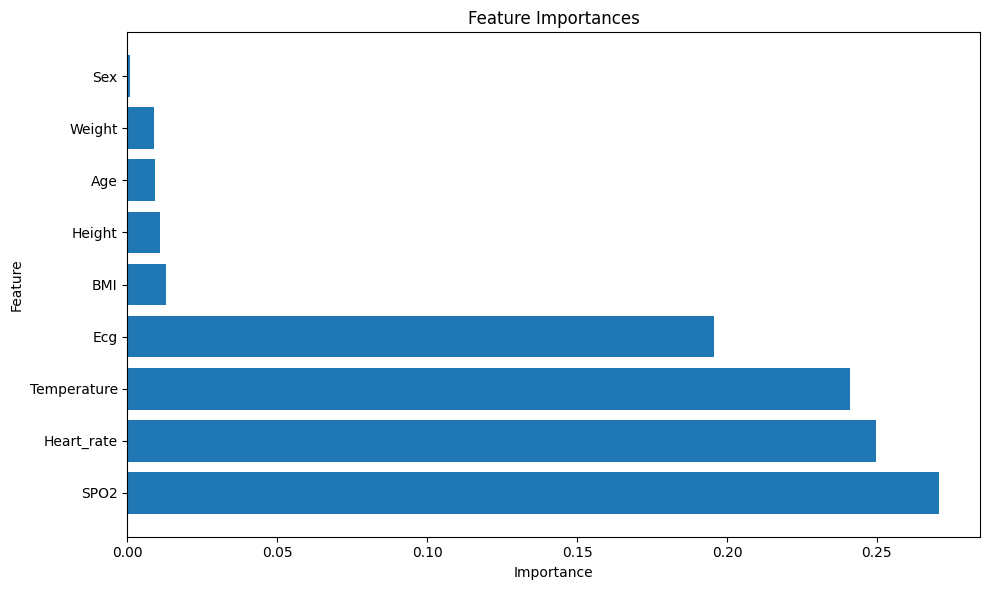

In [ ]:
feature_names = ['Age', 'Weight',	'Height',	 'Sex', 'BMI', 	'Temperature', 	'Heart_rate',	'SPO2',	'Ecg', 	'Status' ]

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
pip install pandas scikit-learn xgboost

In [ ]:
from xgboost import XGBClassifier

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:17:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.96
Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.90      0.95        20

    accuracy                           0.96        51
   macro avg       0.97      0.95      0.96        51
weighted avg       0.96      0.96      0.96        51



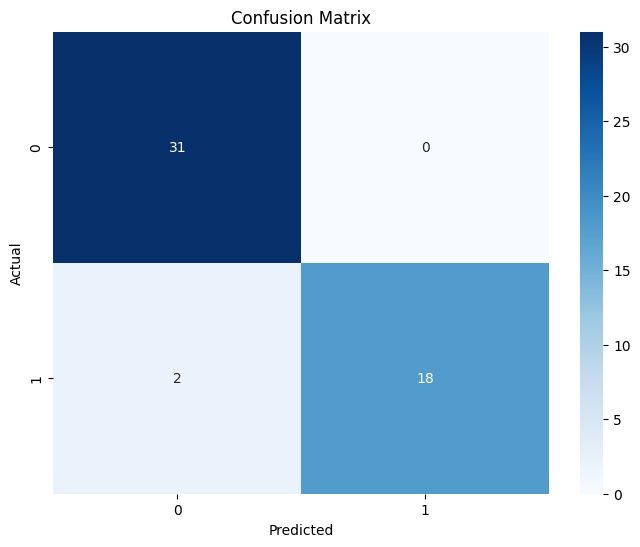

In [ ]:
# Initialize XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


# Output the results
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# Assuming you have features X and labels y

# Apply SMOTE (if needed)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize XGBoost classifier without use_label_encoder
model = XGBClassifier(eval_metric='logloss')

# Set up K-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform K-Fold Cross Validation
cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')

# Output the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {cv_results.mean():.2f}")
print(f"Standard Deviation: {cv_results.std():.2f}")


Cross-Validation Accuracy Scores: [0.98113208 1.         0.96226415 1.         1.         1.
 1.         1.         1.         0.98076923]
Mean Accuracy: 0.99
Standard Deviation: 0.01


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:53:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       1.00      0.95      0.98        42

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



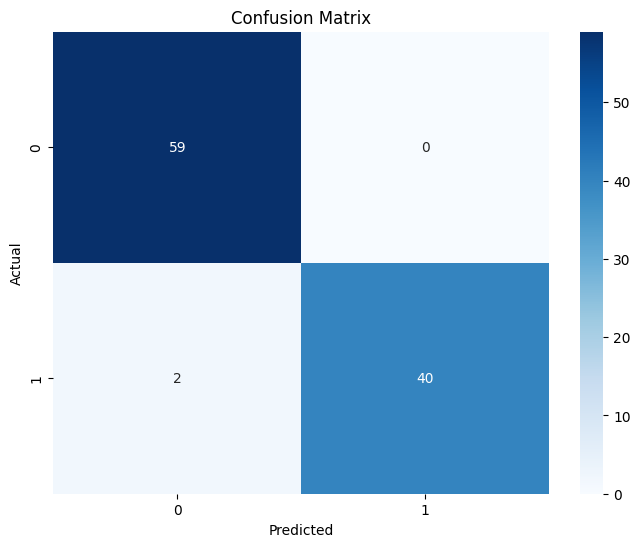

In [ ]:
def generate_random_temperature(low, high):
    return round(random.uniform(low, high), 2)
df['Temperature'] = [generate_random_temperature(36.1, 37.2) for _ in range(len(df))]

In [ ]:
# Replace Status values
df['Status'] = df['Status'].replace({0: 'normal', 1: 'abnormal'})

# Filter for age group 50
filtered_df = df[df['Age'] == 50]

# Display the filtered DataFrame
print(filtered_df)

     Age  Weight  Height  Sex        BMI  Temperature  Heart_rate  SPO2  Ecg  \
4     50      87     153    0  37.165193        36.40          64    99    0   
5     50      75     175    1  24.489796        37.16          65   100    0   
24    50      66     164    0  24.538965        36.82          60    95    0   
27    50      81     165    1  29.752066        37.13          63    98    0   
94    50      88     178    1  27.774271        36.44          82    72    0   
134   50      73     160    0  28.515625        37.12          45    80    0   
136   50      61     158    0  24.435187        37.15          43    78    0   
166   50      81     152    0  35.058864        36.46          37    72    1   
168   50      50     160    0  19.531250        37.01          60    94    1   
171   50      73     160    0  28.515625        36.22          63    91    1   
185   50      75     176    1  24.212293        36.68          77    77    1   
188   50      83     168    1  29.407596

In [ ]:
heart_data = filtered_df[['Temperature','Heart_rate','SPO2','Status']].reset_index(drop=True)

heart_data.head()

,Temperature,Heart_rate,SPO2,Status
0,36.40,64,99,normal
1,37.16,65,100,normal
2,36.82,60,95,abnormal
3,37.13,63,98,abnormal
4,36.44,82,72,abnormal


In [ ]:
pip install pandas scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
heart_data['Status'] = heart_data['Status'].map({'normal': 0, 'abnormal': 1})

In [ ]:
X = heart_data[['Temperature', 'Heart_rate', 'SPO2']]
y = heart_data['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


# Output the results
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:20:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
heart_data.head(30)

,Temperature,Heart_rate,SPO2,Status
0,36.76,64,99,0
1,36.19,65,100,0
2,36.78,60,95,1
3,36.59,63,98,1
4,36.26,82,72,1
5,36.49,45,80,1
6,36.73,43,78,1
7,36.63,37,72,1
8,36.81,60,94,1
9,37.07,63,91,1


In [ ]:
heart_data.shape

(29, 4)

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# Path to your service account key
cred = credentials.Certificate('/content/user-heart-rate-firebase-adminsdk-qhpmz-6893739104.json')

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://user-heart-rate-default-rtdb.firebaseio.com/'})

In [ ]:
# Reference to your Firebase Realtime Database
ref = db.reference('\heart_data')

# Push data to the database
ref.set(heart_data.to_dict(orient='records'))

print('Data pushed successfully!')

Data pushed successfully!


In [ ]:
ref = db.reference('/sensor_data/heart_spo2')
ref.get()

{'avg_bpm': '19',
 'bpm': '78.64',
 'heart_rate': '136',
 'hr_valid': '1',
 'spo2': '-999',
 'spo2_valid': '0',
 'timestamp': 1723286385.3379133}

In [ ]:
import pandas as pd
data_dict = ref.get()
# If data_dict is not empty
if data_dict:
    data = pd.DataFrame(data_dict, index=[0])  # Use a single-element list as index
    print(data)
else:
    print("No data retrieved from Firebase.")

  avg_bpm    bpm heart_rate hr_valid  spo2 spo2_valid     timestamp
0       0  11.55        136        1  -999          0  1.723287e+09


In [ ]:
data.to_csv('data.csv')

In [ ]:
new_data = pd.read_csv('data.csv')

In [ ]:
new_data.head()

,Unnamed: 0,avg_bpm,bpm,heart_rate,hr_valid,spo2,spo2_valid,timestamp
0,0,0,11.55,136,1,-999,0,1.723287e+09


In [ ]:
new_data.drop(['Unnamed: 0', 'avg_bpm', 'hr_valid', 'spo2_valid', 'timestamp'], axis=1, inplace=True)

In [ ]:
new_data.head()

,bpm,heart_rate,spo2
0,11.55,136,-999


In [ ]:
new_data['status'] = new_data['heart_rate'].apply(lambda x: 1 if x > 100 else 0)

In [ ]:
new_data['Temperature'] = [generate_random_temperature(36.1, 37.2) for _ in range(len(new_data))]

In [ ]:
x_data = new_data
y_data = new_data['status']

In [ ]:
df.rename(columns={
    'bpm': 'Heart_rate',
    'heart_rate': 'Heart_rate',  # Assuming you want to rename 'heart_rate' to 'Heart_rate'
    'spo2': 'SPO2',
    'status': 'Status'  # Rename as necessary or drop if not needed
}, inplace=True)

In [ ]:
X = new_data[['Temperature', 'Heart_rate', 'SPO2']]
y = new_data['Status']

In [ ]:
X.head()

,Temperature,Heart_rate,Heart_rate,SPO2
0,37.12,11.55,136,-999


In [ ]:
y.head()

,Status
0,1
